![Alt text: Slogan da Meteora.](https://i.imgur.com/VDYh2G1.png)

# 1. Estruturando a tabela

**Meteora** é uma loja que vende roupas e acessórios de diversas marcas por todos os estados do Brasil, para entender suas bases de dados e exibir informações relevantes com o objetivo de auxiliar suas tomadas de decisão.

In [2]:
# Bibliotecas

# Tratamento de dados
import pandas as pd

# gráficos
import matplotlib.pyplot as plt

# sql
from sqlalchemy import create_engine, inspect, text

**Sobre as tabelas**

* itens_pedidos: tabela que informa sobre o que foi vendido, vai ter informação o preço, quantidade, para onde vai ser enviado e o frete do pedido
* pedidos: vai falar sobre a venda feita, tendo informação sobre os vendedores, preço do pedido e a data da venda
* produtos: informa características dos produtos que são comercializados na loja
* vendedores: informa o nome dos vendedores.

In [3]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [4]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [5]:
engine = create_engine('sqlite:///:memory:')

In [6]:
produtos.to_sql('produtos',engine, index=False)

205

In [7]:
itens_pedidos.to_sql('itens_pedidos',engine, index=False)
pedidos.to_sql('pedidos',engine, index=False)
vendedores.to_sql('vendedores',engine, index=False)

5

In [8]:
inspector = inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


# 2. Primeiras consultas

Vamos entender a característica do produto que é comercializadora na Meteora, analisando a **condição** dos produtos vendidos.

In [9]:
query = 'SELECT CONDICAO FROM PRODUTOS'

In [10]:
with engine.connect() as conexao:
  consulta = conexao.execute(text(query))
  dados = consulta.fetchall()

pd.DataFrame(dados, columns = consulta.keys())

,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [11]:
def sql_df(query):
  with engine.connect() as conexao:
    consulta = conexao.execute(text(query))
    dados = consulta.fetchall()

  return pd.DataFrame(dados, columns = consulta.keys())


In [12]:
query = '''SELECT CONDICAO , COUNT(*) AS 'Quantidade'
FROM PRODUTOS
GROUP BY CONDICAO;'''
df_produtos = sql_df(query)

<BarContainer object of 3 artists>

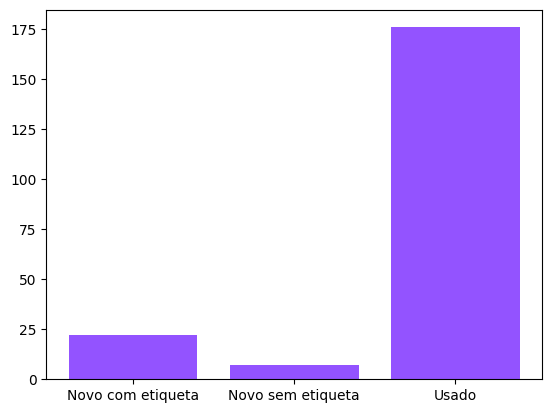

In [13]:
plt.bar(df_produtos.Condicao, df_produtos.Quantidade,color = '#9353FF')

Agora precisamos ranquear os produtos que mais foram pedidos por **quantidade** para entender a necessidade de um estoque de produtos na loja.

In [14]:
sql_df('SELECT * FROM PRODUTOS').head(3)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [15]:
sql_df('SELECT * FROM ITENS_PEDIDOS').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


In [16]:
query = '''SELECT IP.PRODUTO_ID, P.PRODUTO, SUM(IP.QUANTIDADE) AS Quantidade
FROM
ITENS_PEDIDOS IP
INNER JOIN
PRODUTOS P
ON
IP.PRODUTO_ID = P.PRODUTO_ID
GROUP BY P.PRODUTO
ORDER BY Quantidade ASC'''

In [17]:
df_prod_quant = sql_df(query)
df_prod_quant

,produto_id,produto,Quantidade
0,47682,Vestido Malha Estampa,318
1,84743,Blusa Listrada Malha,322
2,88368,Blusa Malha Azul,325
3,32986,Blusa Babados Off-white,337
4,2706,Blusa Cinza,341
...,...,...,...
196,32126,Saia Midi Cinto,549
197,11218,Calca Alfaiataria Preta,750
198,72667,Saia Pregas Preta,751
199,98640,Calca Jeans Costuras,755


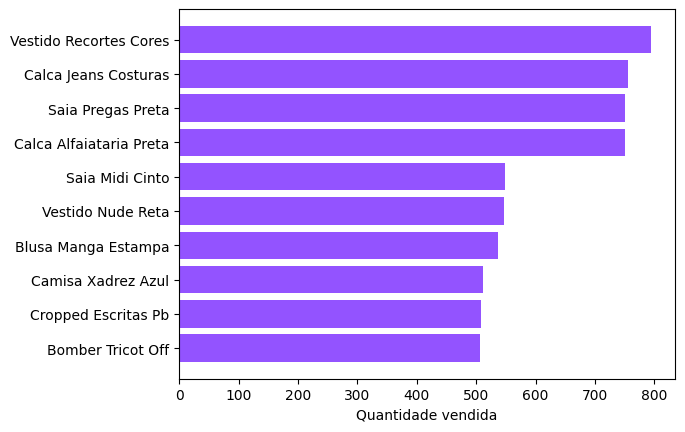

In [18]:
plt.barh(df_prod_quant.produto[-10:],df_prod_quant.Quantidade[-10:],color  ='#9353FF')
plt.xlabel('Quantidade vendida')
plt.show()

# 3. Lidando com filtro

Vamos iniciar uma análise de desempenho do **time de vendedores** da Meteora. A intenção aqui é entender como se deram as vendas dos vendedores no **ano anterior** para que possam ser aplicadas promoções e bônus salarial para a equipe no ano atual da tabela que é 2021

In [19]:
sql_df('SELECT * FROM PEDIDOS').head(3)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600


In [20]:
sql_df('SELECT * FROM PEDIDOS').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pedido_id    24527 non-null  int64 
 1   produto_id   24527 non-null  int64 
 2   vendedor_id  24527 non-null  int64 
 3   data_compra  24527 non-null  object
 4   total        24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


Para entender o desempenho de vendas dos vendedores no ano de 2020, é preciso trabalhar com os dados que estão presentes apenas no ano de 2020.

In [21]:
query = '''SELECT VENDEDOR_ID, data_compra, COUNT(*)
FROM PEDIDOS P
WHERE strftime('%Y', data_compra) = '2020'
GROUP BY P.VENDEDOR_ID
'''

In [22]:
sql_df(query)

,vendedor_id,data_compra,COUNT(*)
0,1,2020-01-01,3427
1,2,2020-01-01,3338
2,3,2020-01-01,2782
3,4,2020-01-01,2510
4,5,2020-01-02,2488


In [23]:
query = '''SELECT V.NOME_VENDEDOR,  COUNT(P.PEDIDO_ID) AS  'Quantidade vendas'
FROM
PEDIDOS P
INNER JOIN
VENDEDORES V
ON V.VENDEDOR_ID = P.VENDEDOR_ID
WHERE strftime('%Y', data_compra) = '2020'
GROUP BY V.NOME_VENDEDOR
ORDER BY 'Quantidade vendas' ASC;
'''

In [24]:
sql_df(query)

,nome_vendedor,Quantidade vendas
0,Ana Duarte,3427
1,Daniel Siqueira,3338
2,Millena Pereira,2510
3,Nadia Oliveira,2782
4,Paulo Calanca,2488


In [25]:
query = '''SELECT V.NOME_VENDEDOR,  AVG(P.TOTAL) AS  'Média vendas'
FROM
PEDIDOS P
INNER JOIN
VENDEDORES V
ON V.VENDEDOR_ID = P.VENDEDOR_ID
WHERE strftime('%Y', data_compra) = '2020'
GROUP BY V.NOME_VENDEDOR
ORDER BY AVG(P.TOTAL) DESC;
'''

In [26]:
sql_df(query)

,nome_vendedor,Média vendas
0,Daniel Siqueira,1972.338526
1,Millena Pereira,1894.614343
2,Ana Duarte,1843.452582
3,Nadia Oliveira,1818.342200
4,Paulo Calanca,1813.469855


# 4. Avançando nas relações

A Meteora agora deseja incrementar as suas vendas no **estado de São Paulo (SP)**, por acreditar ser uma região mais propícia às vendas já que tem uma boa concentração de pessoas e mercado também.

Mas será que São Paulo já não rende muitas vendas em relação a outros estados?

In [27]:
query = '''SELECT ESTADO, COUNT(*) AS 'Pedidos'
FROM ITENS_PEDIDOS
GROUP BY ESTADO
ORDER BY Pedidos DESC;
'''

In [28]:
sql_df(query)

,Estado,Pedidos
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RR,925
8,BR-RO,925
9,BR-RN,921


Uma das ações que a Meteora pretende seguir para as vendas em SP é escolher dois de seus vendedores para que eles **foquem suas vendas** lá. Para essa escolha é interessante ter os profissionais que **mais tenham vendido** para as pessoas da região.

In [29]:
query = '''SELECT P.VENDEDOR_ID, IP.ESTADO,	 COUNT(*) AS quantidade_vendas
FROM
PEDIDOS P
JOIN
ITENS_PEDIDOS  IP
ON IP.PEDIDO_ID = P.PEDIDO_ID
WHERE IP.ESTADO = 'BR-SP'
GROUP BY IP.ESTADO, P.VENDEDOR_ID
ORDER BY quantidade_vendas DESC;
'''

In [30]:
sql_df(query)

,vendedor_id,Estado,quantidade_vendas
0,2,BR-SP,190
1,5,BR-SP,182
2,3,BR-SP,181
3,1,BR-SP,180
4,4,BR-SP,157


In [31]:
query = '''SELECT V.NOME_VENDEDOR, COUNT(*) AS quantidade_vendas
FROM
PEDIDOS P
JOIN VENDEDORES V
ON V.VENDEDOR_ID = P.VENDEDOR_ID
JOIN  ITENS_PEDIDOS  IP
ON IP.PEDIDO_ID = P.PEDIDO_ID
WHERE IP.ESTADO = 'BR-SP'
GROUP BY IP.ESTADO, P.VENDEDOR_ID
ORDER BY quantidade_vendas DESC;
'''

In [32]:
sql_df(query)

,nome_vendedor,quantidade_vendas
0,Daniel Siqueira,190
1,Paulo Calanca,182
2,Nadia Oliveira,181
3,Ana Duarte,180
4,Millena Pereira,157
